# Mercoledì 22 ottobre 2025 (Tutorato)

# Primo step: Download del Dataset



In [18]:
import pandas as pd

# Legge il file Excel
pima = pd.read_csv('../Dataset/PIMA.xls')

# Mostra le prime 5 righe
pima.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
len(pima) # Lunghezza del dataset

768

In [20]:
pima.info() # Descrizione di ogni colonna del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
pima.loc[100] # Visualizza la 100° riga

Pregnancies                   1.000
Glucose                     163.000
BloodPressure                72.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          39.000
DiabetesPedigreeFunction      1.222
Age                          33.000
Outcome                       1.000
Name: 100, dtype: float64

Chi ha insulina e skin tickness uguali a 0 sarebbe già morto questo indica quindi dei valori mancanti

In [22]:
ins = pima[pima["Insulin"]==0]
len(ins)

374

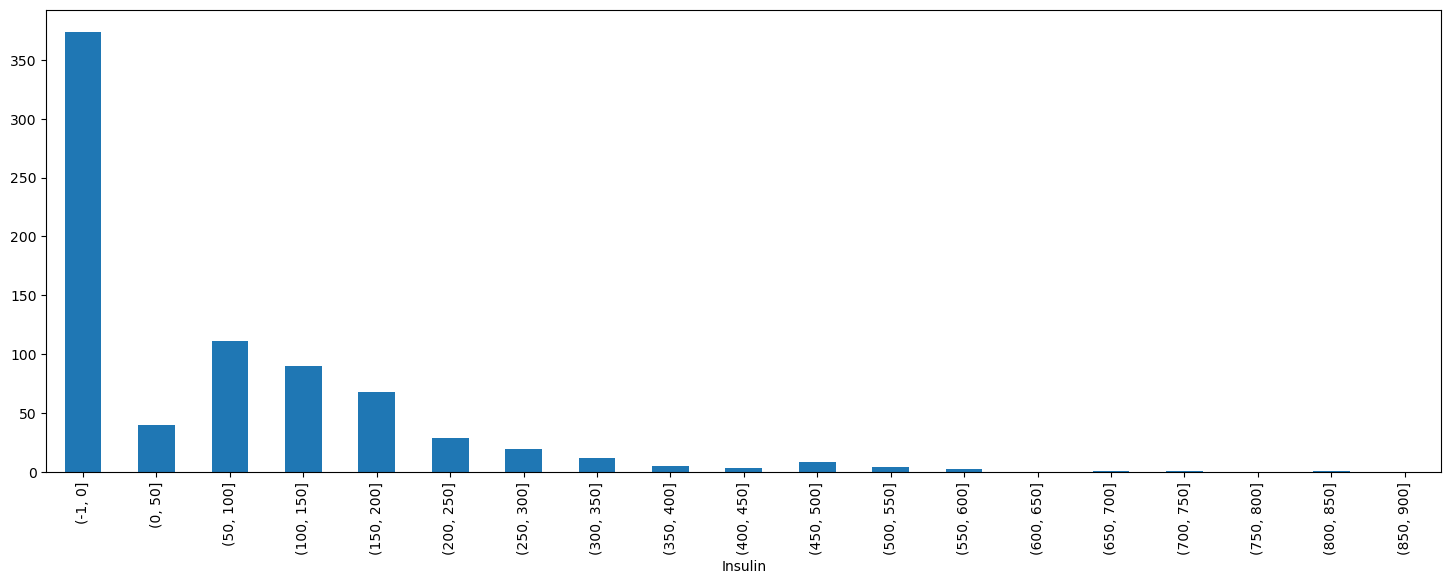

In [23]:
from matplotlib import pyplot as plt

bins = [-1, 0] + list(range(50,901,50))

pd.cut(pima['Insulin'], bins=bins).value_counts().sort_index().plot.bar(figsize=(18,6))

plt.show()

Togliamo i valori nulli dell'insulina quindi quelli mancanti

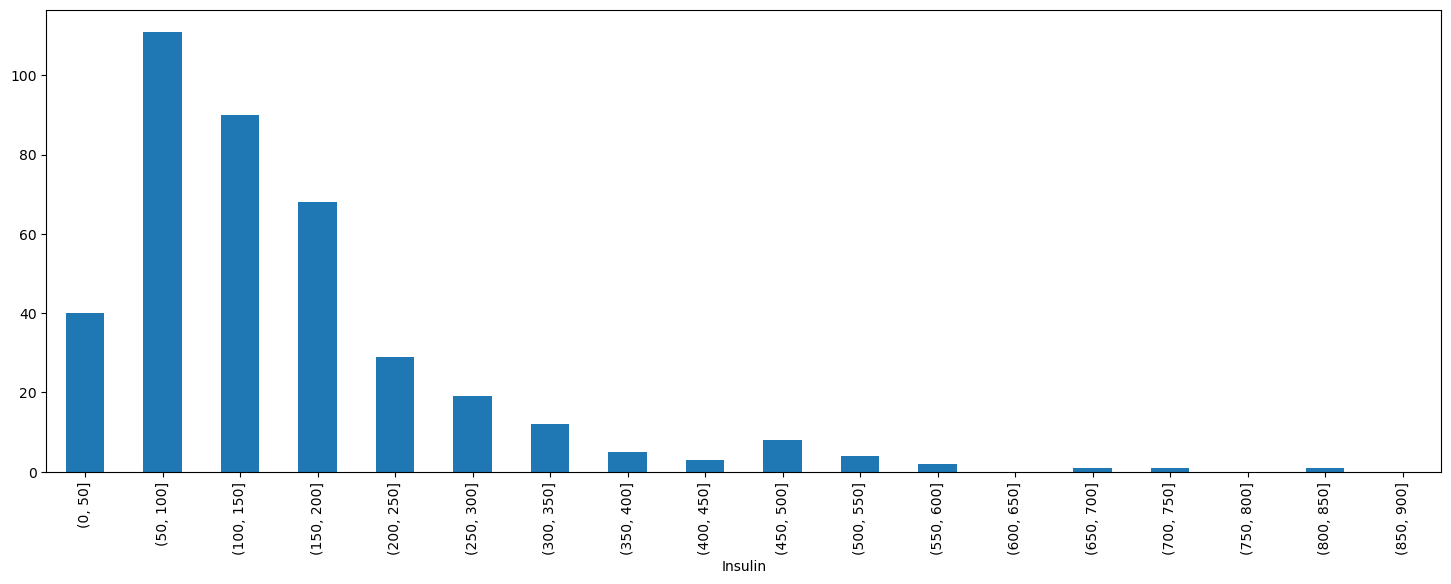

In [24]:
from matplotlib import pyplot as plt

bins = [0] + list(range(50,901,50))

pd.cut(pima['Insulin'], bins=bins).value_counts().sort_index().plot.bar(figsize=(18,6))

plt.show()

# Analisi generali dei dati

Dobbiamo capire come si distribuiscono i dati e come si comportano. Questo dataset è di classificazione per capire se una persona ha il diabete o meno.

## Analisi univariata dei dati

Studiamo per ogni attributo:
- Media
- Mediana
- Shewness
- Kurtosis
- Deviazione Standard

Skewness e Kurtosis alti indicano che le distribuzioni sono falsate e questo è dovuto alla presenza di 0 nel dataset, i valori mancanti. Indicano la presenza di outliers.

## Outliers

**IMPORTANTE:** Rimuoviamo i valori a zero perchè lo 0 indica assenza del dato. Per individuare gli outliers utilizziamo il boxplot. I quartili dividono il nostro dataset in 4 parti di uguale dimensione, una buona idea è quella di considerare outliers tutti gli elementi che sono più piccoli del primo quartile meno la distanza interquartile.

Nel boxplot il quadrato rappresenta il 50% dei miei dati nel mezzo ho la mediana (secondo quartile), la linea inferiore rappresenta il primo quartile, la linea superiore rappresenta il terzo quartile. Il baffo inferiore è dato da `Q1 - 1.5 * IQR` ed il baffo superiore è dato da `Q3 + 1.5 * IQR`. Tutto ciò che sta sopra il baffo superiore, o sotto il baffo inferiore viene definito outlier.

Gli outliers o si scartano o si accettano così come sono facendo un modello separato per gli outliers.

## Analisi Multivariata

Analizziamo il comportamento di più variabili effettuando un paragone tra di esse.

Confrontiamo le gravidanze rispetto al diabete. Assumiamo che il campione rappresenti la popolazione

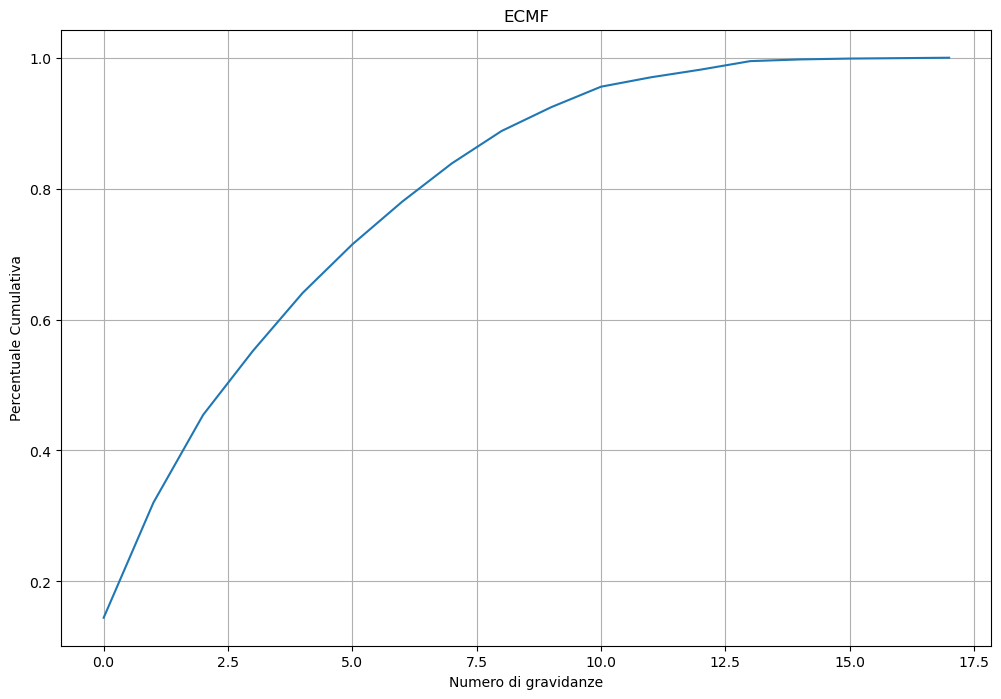

In [28]:
pima['Pregnancies'].value_counts(normalize=True).sort_index().cumsum().plot(figsize=(12,8))
plt.title("ECMF")
plt.xlabel("Numero di gravidanze")
plt.ylabel("Percentuale Cumulativa")
plt.grid()
plt.show()

Un numero di gravidanze basso spesso aiuta a non avere il diabete, un numero alto di gravidanze non è detto che influisca nell'avere il diabete o meno.

All'aumentare dell'indice di massa corporea non notiamo una particolare influenza, lo notiamo tramite lo scatter plot. Vediamo una nuvola di punti che non indica un rapporto di causa effetto.

Mettendo in relazione gravidanze ed età, chi ha più di 5 gravidanze ha necessariamente un età non giovane.

Mettendo in relazione glucosio ed insulina, al crescere del glucosio cresce anche l'insulina, i puntini sono disposti come se fosse una curva che cresce non è detto che la crescita sia lineare, ma il glucosio porta un aumento dei valori di insulina.

## Correlazione tra variabili

Si calcola a coppie di variabili, è un numero che se:

- 1: All'aumentare della variabile X aumenta la variabile Y
- -1: All'aumentare della variabile X diminusice la variabile Y
- circa 0: Non abbiamo correlazione tra le due variabili

Stampando la matrice di correlazione otteniamo una matrice simmetrica con diagonale principale sempre 1, valori più scuri indicano le variabili che hanno una correlazione più alta.

Outcome è correlata positivamente al glucosio e all'insulina.